In [62]:
import polars as pl
import scipy.io
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
from typing import Literal

In [63]:
path = Path("/Users/mds8301/Library/CloudStorage/OneDrive-NorthwesternUniversity/gaby_data/CueEscape/Day1/CueEscape_142-237_Cue_DA_z_score_DA_d1.mat")

In [91]:

# read the data in
# grab 'data'
#checking data key and label avoid = 0, escape = 1
# concat all arrays, add time axis, write dataframe
# 
def label_behavior(label: str)-> Literal[0,1]:
    if 'Escape' in label:
        return 1.
    else:
        return 0.
    
def read_mat_file(path:Path)-> np.array:
    data = scipy.io.loadmat(path)
    for k,v in data.items():
        if 'data' in k:
            traces = v
            label = label_behavior(k)
    labels = np.array([label for _ in range(traces.shape[0])])
    return np.column_stack([labels, traces])

data = read_mat_file(path)

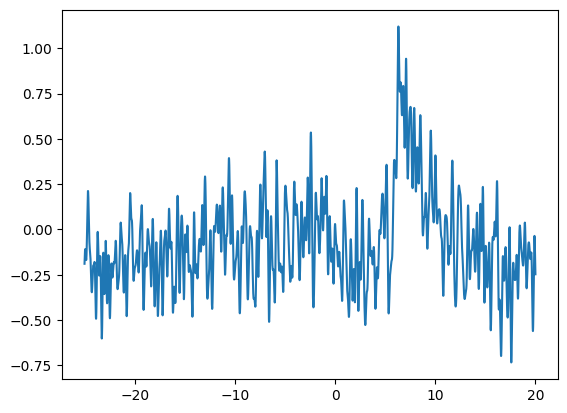

In [56]:
plt.plot(data['timeAxis'].flatten(), data['CueEscapePSTHA'].flatten())

In [19]:
traces = data['CueAvoid_data']


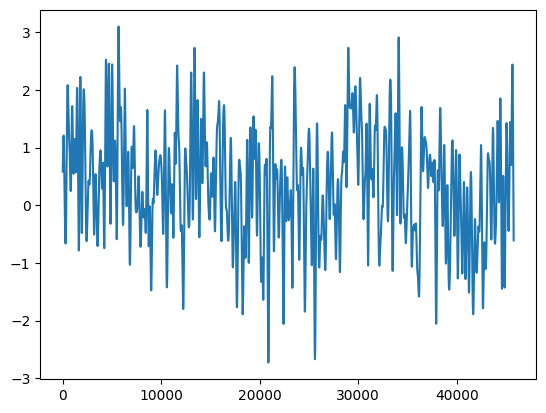

In [24]:
plt.plot(traces[4])